## Train a simple convnet on the Fashion MNIST dataset

In [2]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from comet_ml import Experiment
experiment = Experiment(
    auto_metric_logging=True,
    auto_param_logging=True,
    auto_histogram_weight_logging=True,
    auto_histogram_gradient_logging=True,
    auto_histogram_activation_logging=True,
    project_name="FASHION MNIST" , api_key = "4S68i3O3gBXtDaJ4MLbF50a8n" , log_code = True)


COMET INFO: Experiment is live on comet.ml https://www.comet.ml/ashishpal2702/fashion-mnist/5c53f51219254b05800e4ab1b4d66fe5



In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [4]:
x_train.shape[0]

60000

*Note:* <br>
x_train is a 3D matrix which has the representation Rows * Columns * Depth. To print the no of rows, we are using x_train.shape[0]

In [5]:
x_test.shape[0]

10000

*Information:* <br>
To identify the no of distinct/unique classes in the data, we are using value_counts function from pandas. The same task can be accompolised with the help of unique() function too. The key is to identify the no of classes to find out how many classes the output variable should have.

In [6]:
import pandas as pd
import numpy as np
pd.value_counts(y_train)

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

*Note:* <br>
From the above, we can observe that there are 10 classes in the problem statement

In [7]:
num_classes = 10

### Find dimensions of an image in the dataset

In [8]:
x_train.shape[1:3]

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

*Information* <br>
It is imperative to do one hot encoding instead of Label encoding as the dimension of the output variable has significant impact on the no of neurons in the last layer

In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

*Information* <br>
Converting the dataset to float to ensure when we normalize the data (by dividing it by 255), we do not end up with zeros but with decimal values between 0 and 1

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

*Information* <br>
Convolution 2D layer in Keras accepts input as 4D - No of images * Length * Breadth * Depth. Hence we are reshaping the image

### Import the necessary layers from keras to build the model

In [13]:
import numpy as np
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [14]:
# Deine Model
model3 = Sequential()

# 1st Conv Layer
model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model3.add(Activation('relu'))

# 2nd Conv Layer
model3.add(Convolution2D(32, 3, 3))
model3.add(Activation('relu'))

# Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model3.add(Dropout(0.25))

# Fully Connected Layer
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))

# More Dropout
model3.add(Dropout(0.5))

# Prediction Layer
model3.add(Dense(10))
model3.add(Activation('softmax'))

# Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [15]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 9, 32)          320       
_________________________________________________________________
activation (Activation)      (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
activation_1 (Activation)    (None, 3, 3, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0

In [16]:
import os
#os.mkdir("my_logs")
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [tensorboard_cb,checkpoint_cb,early_stopping]

In [17]:
history = model3.fit(x_train, y_train, batch_size=32, epochs=10, 
          validation_data=(x_test, y_test), callbacks=callback_list)

COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE
COMET INFO: Ignoring automatic log_parameter('do_validation') because 'keras:do_validation' is in COMET_LOGGING_PARAMETERS_IGNORE


Train on 60000 samples, validate on 10000 samples
Epoch 1/10


COMET INFO: Ignoring automatic log_metric('batch_batch') because 'keras:batch_batch' is in COMET_LOGGING_METRICS_IGNORE
COMET INFO: Ignoring automatic log_metric('batch_size') because 'keras:batch_size' is in COMET_LOGGING_METRICS_IGNORE


60000/60000 [==============================] - 7s 120us/sample - loss: 1.0201 - accuracy: 0.6296 - val_loss: 0.6643 - val_accuracy: 0.7534
Epoch 2/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.7457 - accuracy: 0.7296 - val_loss: 0.6061 - val_accuracy: 0.7764
Epoch 3/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.6890 - accuracy: 0.7520 - val_loss: 0.5692 - val_accuracy: 0.7894
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.6538 - accuracy: 0.7677 - val_loss: 0.5633 - val_accuracy: 0.7941
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.6308 - accuracy: 0.7726 - val_loss: 0.5399 - val_accuracy: 0.7992
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.6165 - accuracy: 0.7791 - val_loss: 0.5293 - val_accuracy: 0.8074
Epoch 7/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.6018 - accuracy: 0.7823 - val_lo

In [18]:
model3.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.5143 - accuracy: 0.8084


[0.51428176612854, 0.8084]

In /Users/ashish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/ashish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/ashish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/ashish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/ashish/opt/anaconda3/lib/pytho

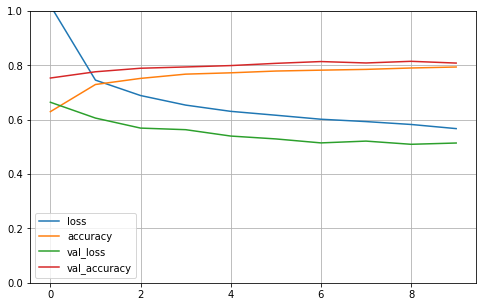

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [22]:
#will log metrics with the prefix 'test_'
with experiment.test():
    test_loss, test_accuracy = model3.evaluate(x_test, y_test)
    train_loss, train_accuracy = model3.evaluate(x_train, y_train)
    metrics = {
        'train_loss':train_loss,
        'train_accuracy':train_accuracy,
        'test_loss':test_loss,
        'test_accuracy':test_accuracy,
    }
    experiment.log_metrics(metrics)

experiment.log_dataset_hash(x_train) 

60000/60000 [==============================] - 2s 34us/sample - loss: 0.4683 - accuracy: 0.8244


In [26]:
experiment.log_model("FASHION MNIST TF1", "my_keras_model.h5")

{'web': 'https://www.comet.ml/api/asset/download?assetId=f880bb0a9a4343b6b3284a4100fb8b8d&experimentKey=f10934bafc54430d8cd2899cb0a66987',
 'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=f880bb0a9a4343b6b3284a4100fb8b8d&experimentKey=f10934bafc54430d8cd2899cb0a66987',
 'assetId': 'f880bb0a9a4343b6b3284a4100fb8b8d'}